# **Problem Statement:** Performing Classification of Traffic Sign for Smart Vehicles
*   **Author:** Borneel Bikash Phukan
*   **Dataset:** [GTSRB](https://drive.google.com/drive/folders/16LC6HL4WJxUi3iU7ti0WokDHjGVUCmKP?usp=sharing) 
*   **Notebook:** Google Colab
*   **Training Loss:** 0.0646
*   **Training Accuracy:** 0.9801
*  **Validation Loss:** 0.5028
*   **Validation Accuracy:** 0.8973
*   **Test Accuracy:** 0.9035629630088806

**Importing the libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

**Importing the Traffic sign dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with open("/content/drive/My Drive/Projects Data/Traffic-Sign-Classification/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Projects Data/Traffic-Sign-Classification/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Projects Data/Traffic-Sign-Classification/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

**Separation into Training set, Validation set and Test set**

In [4]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

**Exploring the Traffic Sign Dataset by loading each data image**

22

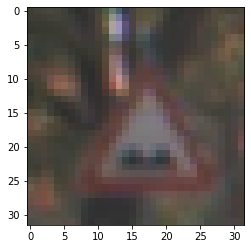

In [5]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

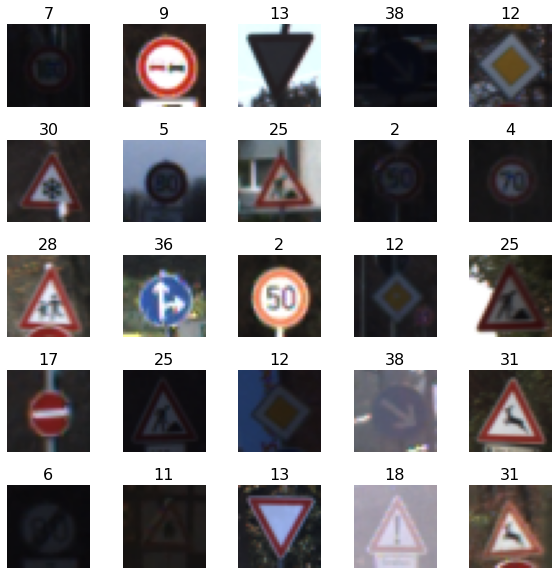

In [6]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize = 16)
  axes[i].axis('off')
     
plt.subplots_adjust(hspace = 0.4)

In [7]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

**Grayscale conversion**

In [8]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray  = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray  = np.sum(x_validation/3, axis=3, keepdims=True)

In [9]:
print("x_train_gray dimensions : {}".format(x_train_gray.shape))
print("x_test_gray dimensions : {}".format(x_test_gray.shape))
print("x_validation_gray dimensions : {}".format(x_validation_gray.shape))

x_train_gray dimensions : (34799, 32, 32, 1)
x_test_gray dimensions : (12630, 32, 32, 1)
x_validation_gray dimensions : (4410, 32, 32, 1)


Normalization of Grayscale Images

In [10]:
x_train_gray_norm = (x_train_gray - 128)/128 
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

In [11]:
print("x_train_gray_norm dimensions : {}".format(x_train_gray_norm.shape))
print("x_test_gray_norm dimensions : {}".format(x_test_gray_norm.shape))
print("x_validate_gray_norm dimensions : {}".format(x_validation_gray_norm.shape))

x_train_gray_norm dimensions : (34799, 32, 32, 1)
x_test_gray_norm dimensions : (12630, 32, 32, 1)
x_validate_gray_norm dimensions : (4410, 32, 32, 1)


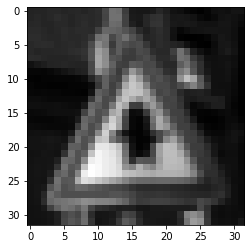

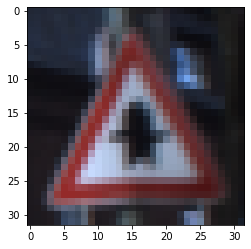

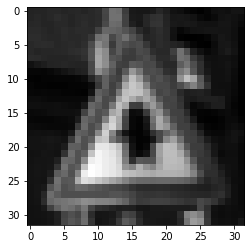

In [12]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

**Building Deep Convolutional Neural Network**

In [13]:
from tensorflow.keras import datasets, layers, models


In [14]:
CNN_model = models.Sequential()

CNN_model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
CNN_model.add(layers.AveragePooling2D())

CNN_model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
CNN_model.add(layers.AveragePooling2D())

CNN_model.add(layers.Dropout(0.2))

CNN_model.add(layers.Flatten())

CNN_model.add(layers.Dense(units=120, activation='relu'))
CNN_model.add(layers.Dense(units=84, activation='relu'))
CNN_model.add(layers.Dense(units=43, activation = 'softmax'))

In [15]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

**Compiling and Training Deep Neural Network**

In [16]:
CNN_model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = CNN_model.fit(x_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (x_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 16s 226ms/step - loss: 3.2088 - accuracy: 0.1580 - val_loss: 2.6927 - val_accuracy: 0.2735
Epoch 2/50
70/70 [==============================] - 16s 226ms/step - loss: 1.6987 - accuracy: 0.5223 - val_loss: 1.2997 - val_accuracy: 0.6440
Epoch 3/50
70/70 [==============================] - 16s 226ms/step - loss: 0.9833 - accuracy: 0.7083 - val_loss: 0.9216 - val_accuracy: 0.7306
Epoch 4/50
70/70 [==============================] - 16s 228ms/step - loss: 0.7449 - accuracy: 0.7774 - val_loss: 0.7801 - val_accuracy: 0.7615
Epoch 5/50
70/70 [==============================] - 16s 227ms/step - loss: 0.6149 - accuracy: 0.8202 - val_loss: 0.7004 - val_accuracy: 0.7968
Epoch 6/50
70/70 [==============================] - 16s 228ms/step - loss: 0.5263 - accuracy: 0.8464 - val_loss: 0.6502 - val_accuracy: 0.8136
Epoch 7/50
70/70 [==============================] - 16s 228ms/step - loss: 0.4680 - accuracy: 0.8638 - val_loss: 0.6194 - val_accuracy: 0.8297

**Assessing the Trained Model Performance**

In [18]:
score = CNN_model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 4s 9ms/step - loss: 0.5671 - accuracy: 0.9036
Test Accuracy: 0.9035629630088806


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Visualizing Training vs Validation Graph**

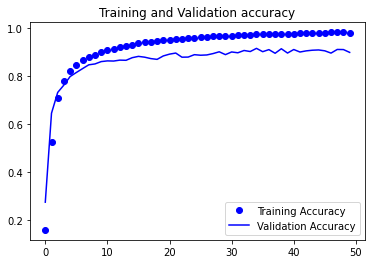

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')    
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

**Visualizing Training vs Validation loss graph**

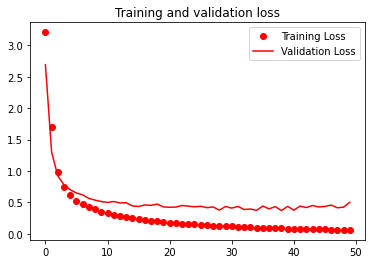

In [21]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Prediction of classification output (using Heatmap)**

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


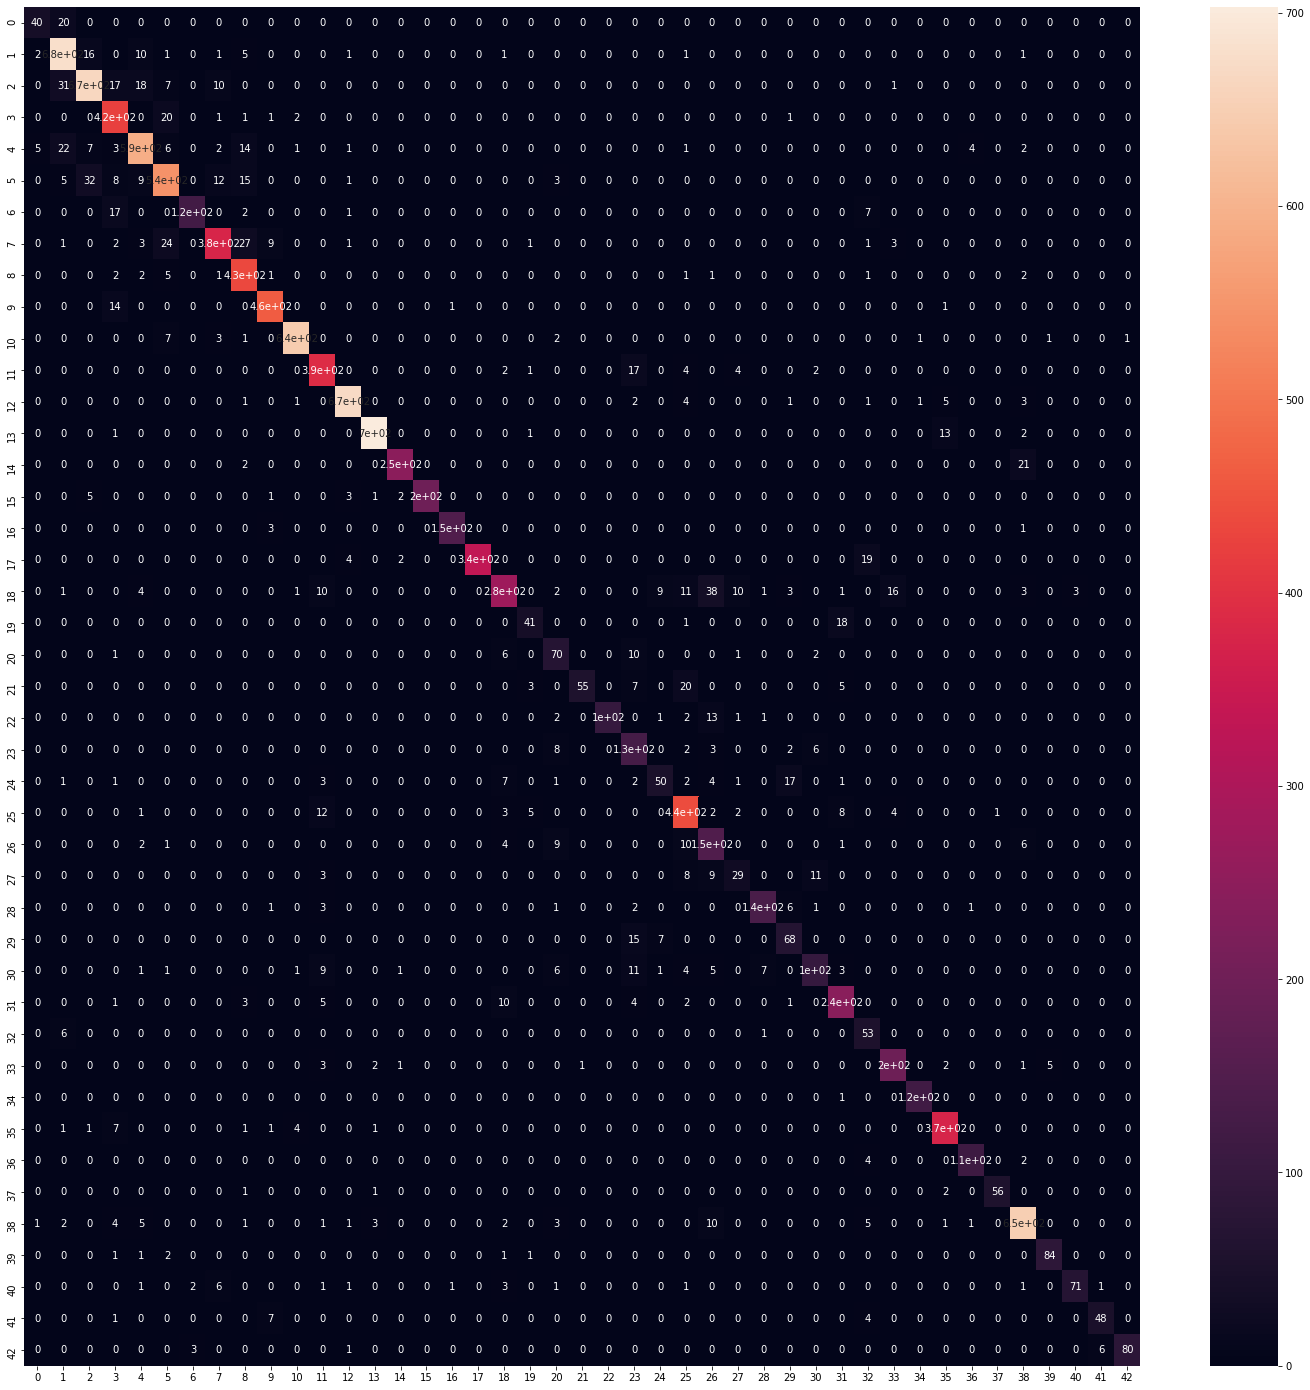

In [22]:
predicted_classes = CNN_model.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

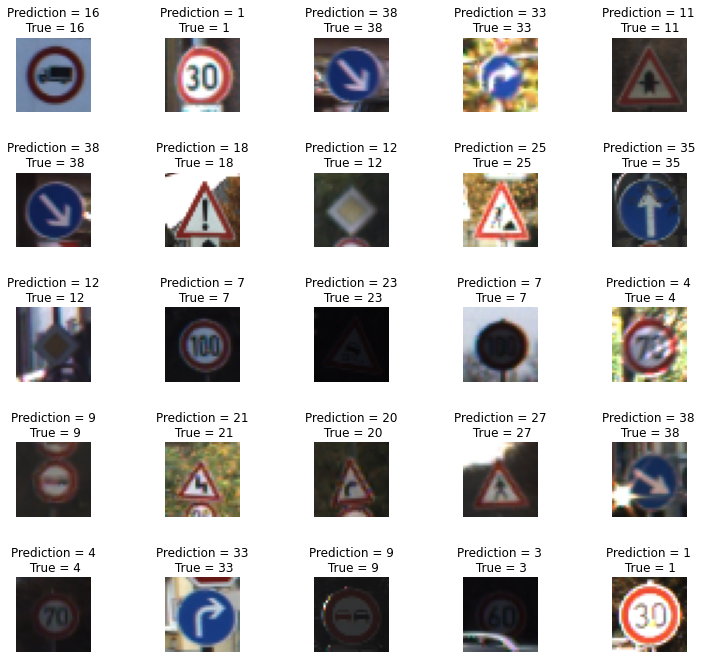

In [23]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

**Appendix**

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }